# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Developing Linear Regression Model

In [2]:
class GD_LinearRegression:
    def __init__(self, eta=0.0001, max_iterations=500, optimizer='BGD', mini_batch=64, momentum=0.9):
        self.eta = eta
        self.max_iterations = max_iterations
        self.optimizer = optimizer
        self.mini_batch = mini_batch
        self.momentum = momentum
        self.theta_ = np.zeros((1,))
        self.loss = []
        
    def fit(self, X, y):
        X_b, y = self.check_X_y(X, y)
        m, n = X_b.shape

        if self.optimizer == 'BGD':
            self.momentum = 0
            self.mini_batch = m
        elif self.optimizer == 'SGD':
            self.momentum = 0
            self.mini_batch = 1
        elif self.optimizer == 'MGD':
            self.momentum = 0
        elif self.optimizer == 'Momentum':
            self.mini_batch = m
        elif self.optimizer == 'NAG':
            self.mini_batch = m
            self.NAG(X_b, y)
            return self
        else:
            print("Unidentified Optimizer")
            return
        self.SGD(X_b, y)
        
        return self
        
    def SGD(self, X_b, y):
        m, n = X_b.shape
        vt = 0
        for i in range(self.max_iterations):
            for j in range(0, m, self.mini_batch):
                X_batch = X_b[j:j + self.mini_batch]
                y_batch = y[j:j + self.mini_batch]
                gradients = X_batch.T.dot(X_batch.dot(self.theta_)-y_batch) / len(X_batch)
                vt = vt*self.momentum - self.eta * gradients
                self.theta_ = self.theta_ + vt
                self.loss.append(X_batch.T.dot(X_batch.dot(self.theta_)-y_batch)**2)
        return self
    
    def NAG(self, X_b, y):
        m, n = X_b.shape
        vt = 0
        for i in range(self.max_iterations):
            for j in range(0, m, self.mini_batch):
                X_batch = X_b[j:j + self.mini_batch]
                y_batch = y[j:j + self.mini_batch]
                self.theta_ = self.theta_ - self.momentum*vt
                gradients = X_batch.T.dot(X_batch.dot(self.theta_)-y_batch) / len(X_batch)
                self.theta_ = self.theta_ - self.eta * gradients
                vt = vt*self.momentum + self.eta * gradients
                self.loss.append(X_batch.T.dot(X_batch.dot(self.theta_)-y_batch)**2)
        return self
    
    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        return X_b.dot(self.theta_)
    
    def check_X_y(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        self.theta_ = np.zeros(shape=n)
        return X_b, y
    
    def get_RSS(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        predictions = self.predict(X)
        residuals = predictions - y
        RSS = np.square(residuals).sum()
        return(RSS)
    
    def R2(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        
        y_bar = np.mean(y)
        sstor = np.sum((X_b.dot(self.theta_) - y_bar)**2)
        rss = self.get_RSS(X, y)
        R2 = 1-rss/sstor
        return R2
    
    def get_params(self, deep=True):
        weights = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            weights[name] = self.theta_[i]
        return weights

# Problem (Multi Variate Model)

In [3]:
data = pd.read_csv("MultipleLR.csv", header=None)
data.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [4]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

## SGD

{'theta_0': 0.007773762323271821, 'theta_1': 0.581085979610647, 'theta_2': 0.5740680193843194, 'theta_3': 0.8756803108663008}


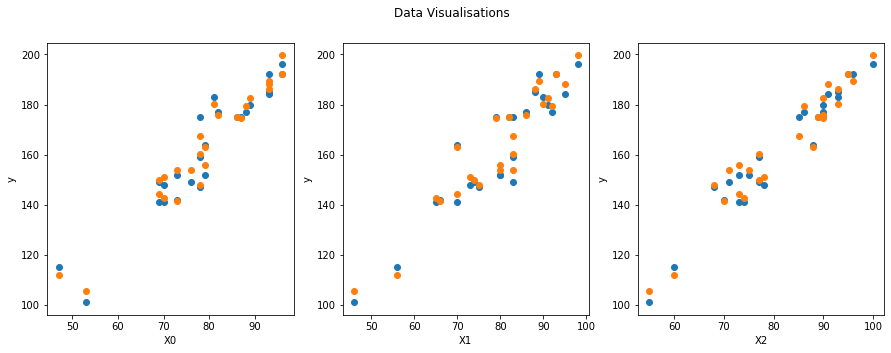

In [5]:
model1 = GD_LinearRegression(eta=0.00001, mini_batch=5, max_iterations=100, optimizer='SGD')
model1.fit(X, y)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X[0], y)
a[0].scatter(X[0], model1.predict(X))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X[1], y)
a[1].scatter(X[1], model1.predict(X))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X[2], y)
a[2].scatter(X[2], model1.predict(X))
a[2].set(xlabel='X2', ylabel='y')

print(model1.get_params())

R2 =  0.9837241511652658


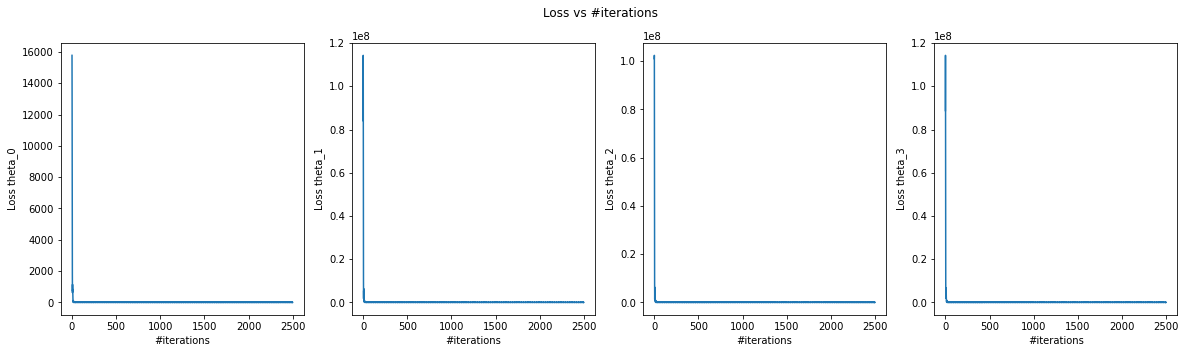

In [6]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model1.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model1.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model1.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model1.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model1.R2(X,y))

## Mini-Batch GD

{'theta_0': 0.00819336595933948, 'theta_1': 0.6491288466142002, 'theta_2': 0.6490828340944035, 'theta_3': 0.7291107431464225}


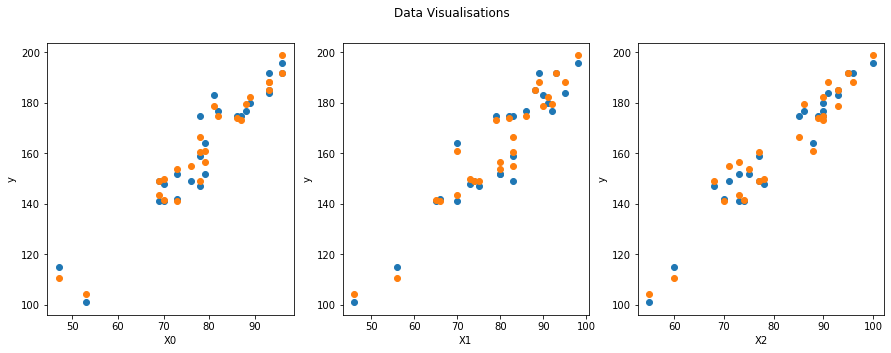

In [7]:
model2 = GD_LinearRegression(eta=0.00001, mini_batch=5, max_iterations=100, optimizer='MGD')
model2.fit(X, y)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X[0], y)
a[0].scatter(X[0], model2.predict(X))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X[1], y)
a[1].scatter(X[1], model2.predict(X))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X[2], y)
a[2].scatter(X[2], model2.predict(X))
a[2].set(xlabel='X2', ylabel='y')

print(model2.get_params())

R2 =  0.9798927108575747


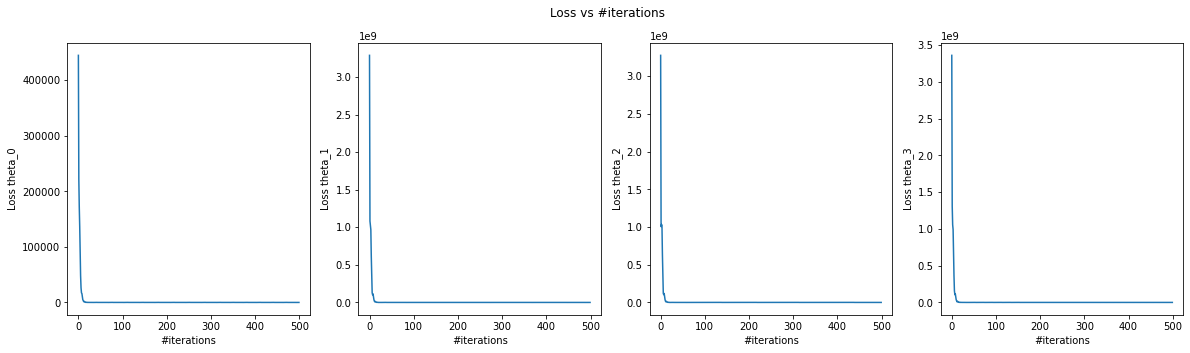

In [8]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model2.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model2.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model2.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model2.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model2.R2(X,y))

## Batch GD

{'theta_0': 0.008250917329349745, 'theta_1': 0.6633920766400221, 'theta_2': 0.6665181668689093, 'theta_3': 0.6951576726694921}


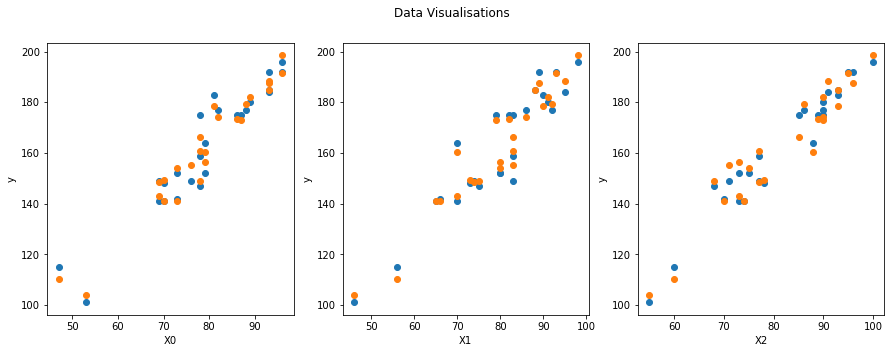

In [9]:
model3 = GD_LinearRegression(eta=0.00001, mini_batch=5, max_iterations=100, optimizer='BGD')
model3.fit(X, y)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X[0], y)
a[0].scatter(X[0], model3.predict(X))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X[1], y)
a[1].scatter(X[1], model3.predict(X))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X[2], y)
a[2].scatter(X[2], model3.predict(X))
a[2].set(xlabel='X2', ylabel='y')

print(model3.get_params())

R2 =  0.9785081415624522


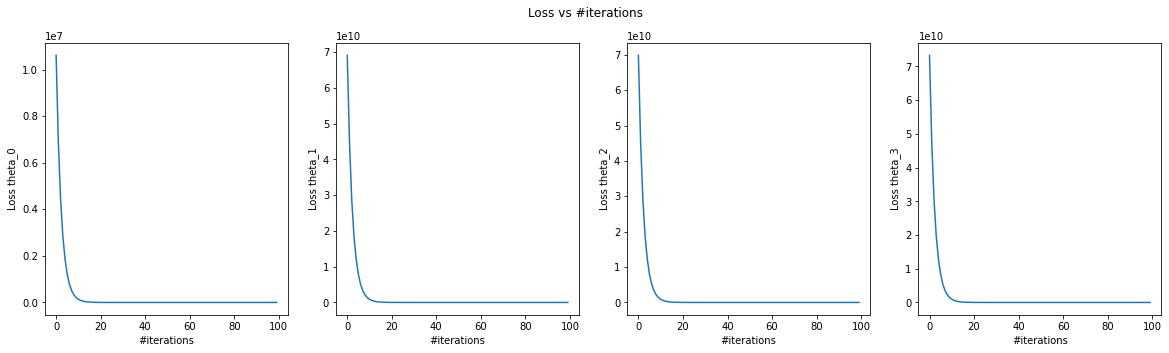

In [10]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model3.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model3.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model3.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model3.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model3.R2(X,y))

## Momentum

{'theta_0': 0.008070106330370828, 'theta_1': 0.6325949384272921, 'theta_2': 0.6331458188366331, 'theta_3': 0.7587117990031272}


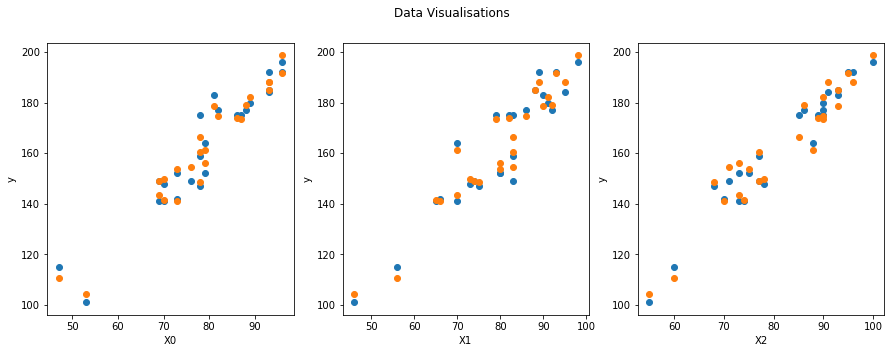

In [11]:
model4 = GD_LinearRegression(eta=0.00001, mini_batch=5, max_iterations=100, optimizer='Momentum')
model4.fit(X, y)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X[0], y)
a[0].scatter(X[0], model4.predict(X))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X[1], y)
a[1].scatter(X[1], model4.predict(X))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X[2], y)
a[2].scatter(X[2], model4.predict(X))
a[2].set(xlabel='X2', ylabel='y')

print(model4.get_params())

R2 =  0.9811729907523742


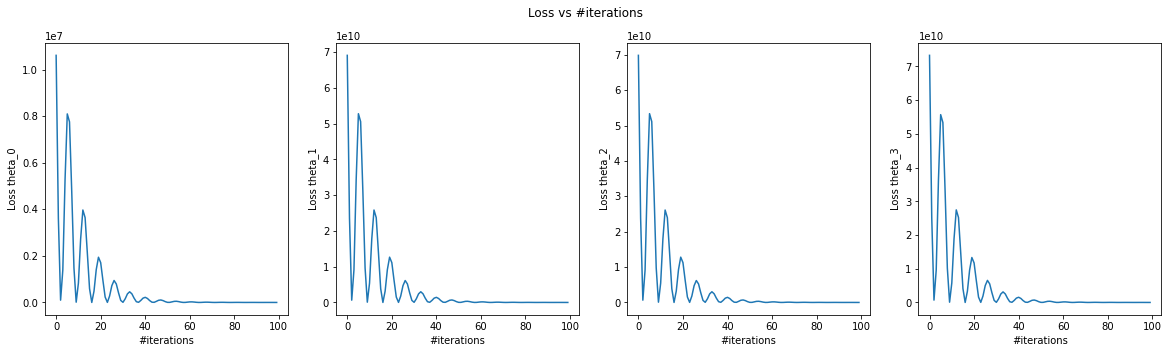

In [12]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model4.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model4.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model4.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model4.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model4.R2(X,y))

## NAG

{'theta_0': 0.008065111514893005, 'theta_1': 0.6322927150081173, 'theta_2': 0.6328810253831756, 'theta_3': 0.7582545965671909}


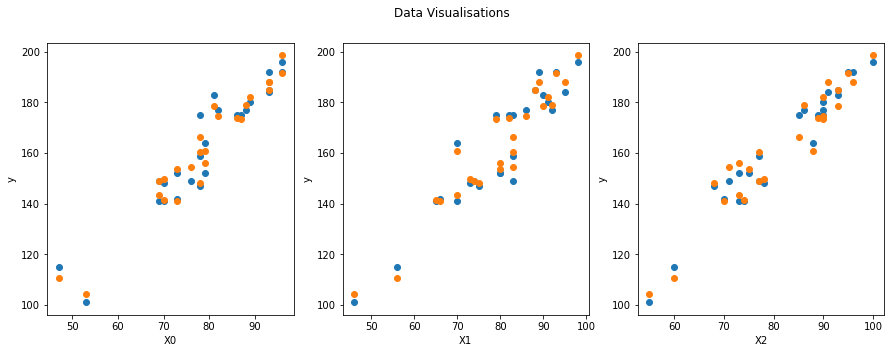

In [13]:
model5 = GD_LinearRegression(eta=0.00001, mini_batch=5, max_iterations=100, optimizer='NAG')
model5.fit(X, y)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X[0], y)
a[0].scatter(X[0], model5.predict(X))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X[1], y)
a[1].scatter(X[1], model5.predict(X))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X[2], y)
a[2].scatter(X[2], model5.predict(X))
a[2].set(xlabel='X2', ylabel='y')

print(model5.get_params())

R2 =  0.9811621156696488


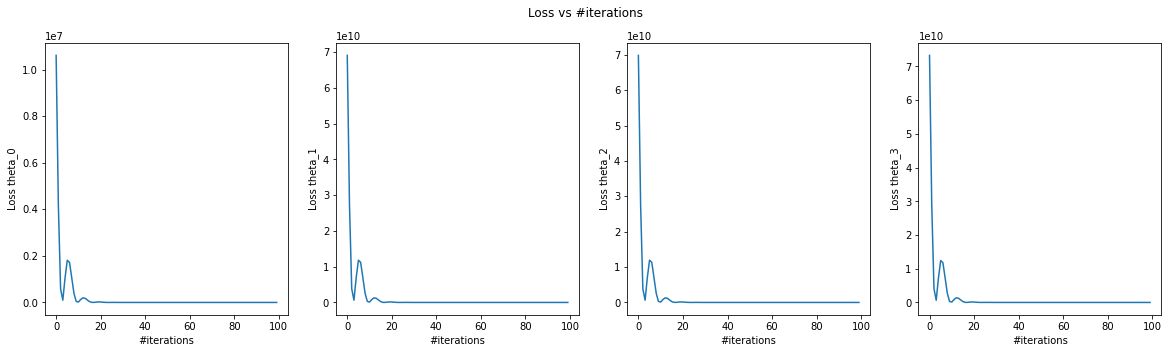

In [14]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model5.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model5.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model5.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model5.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model5.R2(X,y))